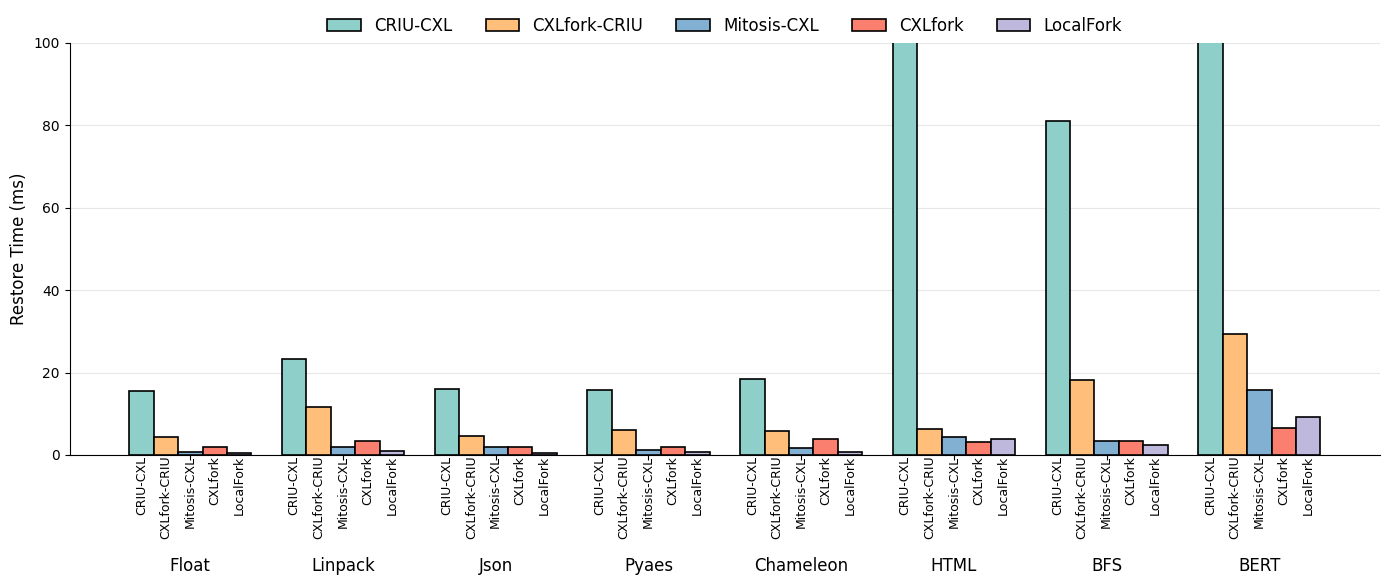

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 准备数据
benchmarks = ['Float', 'Linpack', 'Json', 'Pyaes', 'Chameleon', 
              'HTML', 'BFS', 'BERT']

methods = ['CRIU-CXL', 'CXLfork-CRIU', 'Mitosis-CXL', 'CXLfork', 'LocalFork']

data_values = {
    'CRIU-CXL': [15.48, 23.39, 16, 15.77, 18.32, 160.83, 81.11, 424.05],
    'CXLfork-CRIU': [4.276, 16.855, 4.478, 6.039, 5.819, 6.244, 18.266, 29.289],
    'CXLfork-CRIU-minial': [3.829, 15.379, 4.478, 6.039, 5.819, 6.244, 18.266, 27.812],
    'Mitosis-CXL': [0.808, 1.84364, 1.9528, 1.27064, 1.57181, 4.4339, 3.37435, 15.69729],
    'CXLfork':  [1.97501, 3.48985, 1.8205, 1.86995, 3.81237, 3.22901, 3.46008, 6.5523],
    'LocalFork':[0.42704, 1.00583, 0.57468, 0.74624, 0.78546, 3.78842, 2.34561, 9.1776]
}

x = np.arange(len(benchmarks)) 
total_width = 0.8
n_bars = len(methods)
bar_width = total_width / n_bars

# 设置颜色
colors = ['#8ECFC9', '#FFBE7A', '#82B0D2', '#FA7F6F', '#BEB8DC']
edge_color = 'black'

fig, ax = plt.subplots(figsize=(14, 6))

绘制柱状图
bars = []
for i, method in enumerate(methods):
    # 计算每个柱子的x坐标
    # x + (当前索引 - 中间位置) * 宽度
    x_pos = x + (i - n_bars / 2 + 0.5) * bar_width
    
    bar = ax.bar(
        x_pos, 
        data_values[method], 
        width=bar_width, 
        label=method, 
        color=colors[i], 
        edgecolor=edge_color,
        linewidth=1.2,
        zorder=3
    )
    bars.append(bar)

    # 4. 添加类似原图的垂直标签 (criu-cxl, mitosis...)
    # 在每个柱子下方添加垂直文字
    for j, val in enumerate(data_values[method]):
        ax.text(
            x_pos[j], 
            -0.2,  # Y轴负方向一点点
            method, 
            ha='center', 
            va='top', 
            rotation=90, 
            fontsize=9,
            color='black'
        )

# 5. 设置坐标轴样式
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, fontsize=12)

# 为了给垂直标签留出空间，调整X轴标签的垂直位置
ax.tick_params(axis='x', pad=70) 

# Y轴标签
ax.set_ylabel('Restore Time (ms)', fontsize=12)

# 设置Y轴网格
ax.grid(axis='y', linestyle='-', alpha=0.3, zorder=0)
ax.set_ylim(0, 100)

# 移除顶部和右侧的边框 (类似原图风格)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 6. 添加图例
# 原图图例在顶部，为了美观我们放在左上角或顶部中间
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), 
          ncol=5, frameon=False, fontsize=12)

# 调整布局以防止标签被截断
plt.tight_layout()

# 7. 显示或保存
plt.show()